# Deep Learning + TensorFlow Overview  

Lance Martin 

Collated some points I found interesting from lectures, notes, tutorial, and courses: 

* Yann Lecun - [DL course](https://www.facebook.com/yann.lecun/posts/10153505343037143) at College de France)
* Andrej Karpathy - Stanford [CS231n](http://cs231n.stanford.edu/) 
* Udacity [DL course](https://www.udacity.com/course/deep-learning--ud730) and Google TensorFlow tutorial

---

### Compute power of human brain relative to machines 

* The brain can perform ~ $10^{16}$ operations per second.
* The best GPUs (e.g., NVIDIA Titan-Z) can perform around $10^{12}$ operations per second.
* But, the realistic gap is close to one-million-fold, due to the complexity of synapses.
* That is ~ 30 years of Moore's law. But that alone is unlikely to be enough.
* In addition, we must understand principles of intelligence, rather than copying biology.
* This is analogous to understanding principles of aerodynamics in order to build airplanes, rather than copying wings and feathers.

Source - 
* [Slides 1 - 10: 000c-yann-lecun-lecon-inaugurale-college-de-france-20160204.pdf](https://drive.google.com/drive/u/0/folders/0BxKBnD5y2M8NclFWSXNxa0JlZTg)

---

### Gradient-based supervised learning machines, in general

(1) Design a machine with adjustable knobs -

* A simple machine: The Perceptron (Rosenblatt 1957)
* A complex machine: Neural network with millions of knobs

(2) **Decision rule:**  Map between features and a class label -

* A decision rule $y = F(W,X) $ where $F()$ is some function and $W$ is a paramter. 

(3) **Loss function:** Measure the error between chosen class and true class -

* Squared error, log likelihood, cross-entropy, etc.

(4) **Gradient / optimization:** Figure out what direction to tune the knobs to reduce the error -

* Using gradient or the loss function with respect to weights, and optimization 
* Convex: Invariant to the order in which sample are presented.
* Non-convex: Most speech recognition systems (e.g., GMMs), neural nets, human learning. 
* For non-convex loss, the order of samples matters. Human learning is like this. We learn simple concepts before complex ones.

(4) Repeat with all training examples until knobs stabilize, and then test generalization -

* Each sample gives a noisy estimate of the direction, so the path is random.

Source - 
* [Slides 18 - 23: 000c-yann-lecun-lecon-inaugurale-college-de-france-20160204.pdf](https://drive.google.com/drive/u/0/folders/0BxKBnD5y2M8NclFWSXNxa0JlZTg)
* [Slide 8: 001c-yann-lecun-intro-to-deep-learning.pdf](https://drive.google.com/drive/u/0/folders/0BxKBnD5y2M8NclFWSXNxa0JlZTg)
* [Slide 2-5: 005c-yann-lecun-optimization.pdf](https://drive.google.com/drive/u/0/folders/0BxKBnD5y2M8NclFWSXNxa0JlZTg)
* [Chris Olah blog on information theory](http://colah.github.io/posts/2015-09-Visual-Information/)

---

### Linear machines for supervised learning

(1) Linear regression - 

* Decision rule: $y = W' X $
* Loss function: $L(W,X^i,y^i) = \frac{1}{2} (W' X^i - y^i)^2$
* Gradient: $ \frac{\partial L}{\partial W}  = - (y^i - W' X^i) X^i $
* Update rule: $W = W + \eta (y^i - W' X^i) X^i $

(2) Perceptron: Computes a weighted sum of inputs, and outputs +1 if sum > threshold (else -1) - 

* Decision rule: $y = F(W' X $), with $F$ as threshold function. 
* Loss function: $L(W,X^i,y^i) = (F(W' X^i) - y^i) W' X^i$

(3) Logistic regression - 

* Decision rule: $F(W' X)$ where $F()$ is the sigmoid function $F(W,X) = \frac{1}{1+e^{-W'X}} $. 
* Loss function: $log L(W) = \sum\limits_{i=1}^m y^i \times log h_{\theta}(x^i) + (1-y^i) \times log(1- h_{\theta}(x^i)) $

Source - 
* [Slides 5-7: 001c-yann-lecun-intro-to-deep-learning.pdf](https://drive.google.com/drive/u/0/folders/0BxKBnD5y2M8NclFWSXNxa0JlZTg)
* [Yann LeCun Lecture 1/8 Why Deep Learning?](https://www.youtube.com/watch?v=ChLEJA6J2b8)

---

### Linear machines and linear hyperplanes for classification

Linear decision rules above use a simple dot product to compute a class score. 

A class score of zero means we are indifferent about classification, in 2D:

$$ f(W,X,b) = W_1 X_1 + W_2 X_2 + b =  W_1 X + W_2 Y + b = 0 $$

For a learned $W$, the X,Y pairs that form the linear decision boundary are specified by:

$$ Y = -\frac{W_1}{W_2} X - \frac{b}{W_2} $$

This nice visualization from [CS231 notes](http://cs231n.github.io/linear-classify/) shows lines that indicate all points in the space that get a score of zero for the class.

* The lines are the zero levels for each class.


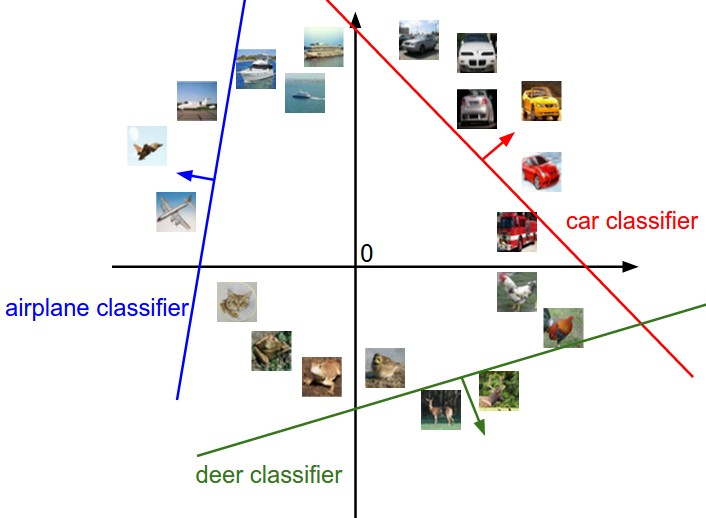

In [205]:
Image(filename=os.getcwd()+'/img/linear.jpeg')

---

###  Problems with linearity

(1) Cover's theorm (1966) - 

* Linear classifiers use hyperplace to establish boundary between classes.
* Given $P$ samples and $N$ dimentions, the probability that they are linearly seperable goes to zero as $P$ >> $N$.

(2) Limited number of model parameters - 

* Linear models will have $(N+1) k$ paramerers, where $k$ is the number of labels.

(3) Can only represent additive relationships - 

* It can model output as a function of the summation of multiple inputs ($X_1 + X_2$).

Source - 
* [Slide 5-7: 001c-yann-lecun-intro-to-deep-learning.pdf](https://drive.google.com/drive/u/0/folders/0BxKBnD5y2M8NclFWSXNxa0JlZTg)
* [Udacity Deep Learning](https://www.udacity.com/course/deep-learning--ud730)

---

###  Addressing problems with linearity

(1) One way to address this is to increace $N$. 

(2) Another way is to use different learning architectures - 

** "Shallow" architectures - Kernels, Trees, etc. **

* SVMs: Use samples as templates for the kernel functions.
* Trees: All decisions are made in the input space.
* Typical pattern recognition systems: Isolated feature extractors.

** "Deep" architectures - Neural nets, etc. **

* They contain a "learned" feature heirarchy.

Source - 
* [Slides 25 - 29: 000c-yann-lecun-lecon-inaugurale-college-de-france-20160204.pdf](https://drive.google.com/drive/u/0/folders/0BxKBnD5y2M8NclFWSXNxa0JlZTg)
* [Slide 33 - 40: 001c-yann-lecun-intro-to-deep-learning.pdf](https://drive.google.com/drive/u/0/folders/0BxKBnD5y2M8NclFWSXNxa0JlZTg)
* [Bengio & LeCun 2007 “Scaling Learning Algorithms Towards AI”](http://yann.lecun.com/exdb/publis/pdf/bengio-lecun-07.pdf)

---

###  Neural nets, in general

General architecture - 

* Acyclic graph with "depth" provided by hidden layer(s).
* Neural Network performs a sequence of linear mappings with interwoven non-linearities.

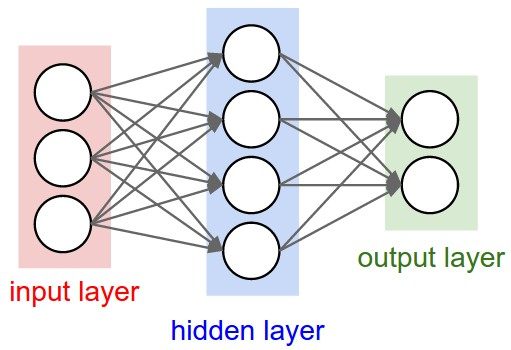

In [208]:
Image(filename=os.getcwd()+'/img/nn.jpeg')

** Intution 1: linear operations are "nice" - **

* Hardware: GPUs were designed for big matrix multiplies.
* Stable: Small changes in input do not result in big changes to output.
* Differentiable: Derivative of linear function is a constant.
* So, each layer in the network uses linear matrix multiply operations (e.g., $WX+b$).

** Intution 2: "depth" gives us ability to learn intermediate representations of the input data - **
 
* This is very useful for certain kinds of classification problems, such as images (e.g., cars).
* A simple "shallow" classifier can learn only "one" template ($W$) for the car class. 
* This should "fire" (produce a higher score) when it sees (dot product $WX+b$) a car input ($X$). 
* But, there are many types of cars (e.g., color, position, etc) that all must be captured in the $W$ template.
*  *** A "deep" classifier can use the hidden layer to learn many templates for the car class. ***
* For example, there can be one hidden neuron for each car type / orientation.
* In the final layer, the class decision is then the *** summation across outputs for all the hidden car neurons. ***

Very nice overview of this by Andrej - 
* [CS 231n lecture 4](https://www.youtube.com/watch?v=59Hbtz7XgjM)

** Intution 3: change the data representation into a space where it's linearly seperable - **
 
* CS231n provides very useful intution with help of Andrej's [ConvNetJS demo](http://cs.stanford.edu/people/karpathy/convnetjs/demo/classify2d.html).
* The network uses the hidden layer to transform input so that second layer can come in with linear classifier. 

Source - 
* [CS 231n lecture 4](https://www.youtube.com/watch?v=59Hbtz7XgjM)

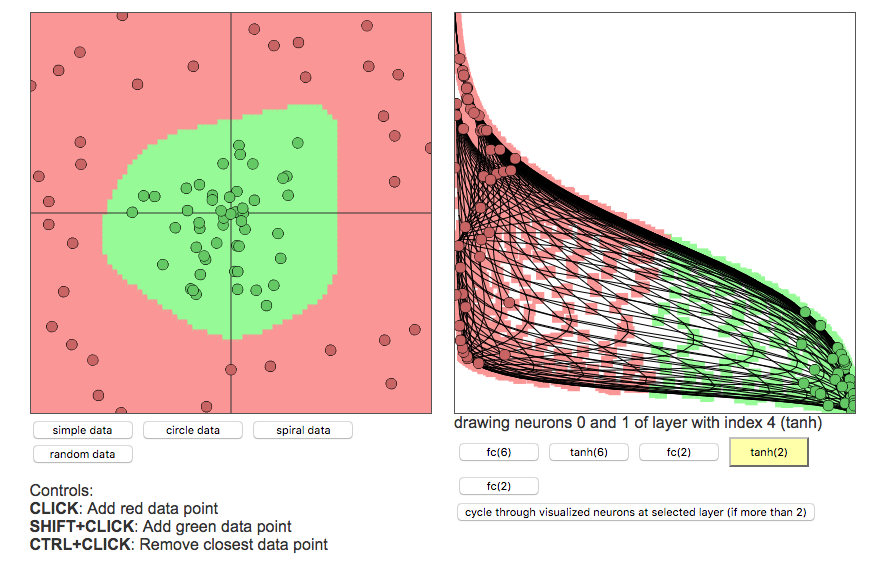

In [210]:
Image(filename=os.getcwd()+'/img/bound.png')

** Intution 4: above transformation achieved by applying non-linear activations between layers - **

* Non-linear transformations / depth can learn complex decision rule $F(W,X)$.

** Intution 5: more hidden layers increaces our ability to learn complex functions  - **
 
* Capacity of the network increases as as we increase the size and number of layers. 
* The neurons can collaborate to express many different functions. 

Source - 
* [Slide 40]: 001c-yann-lecun-intro-to-deep-learning.pdf
* hinton.pdf
* [Slides 30 - 37]: 000c-yann-lecun-lecon-inaugurale-college-de-france-20160204.pdf
* [Slide 54 - 77]: 001c-yann-lecun-intro-to-deep-learning.pdf
* [Slide 30]: 001c-yann-lecun-intro-to-deep-learning.pdf
* Udacity Deep Learning



---

###  Input data

(1) [`notMNIST`](http://yaroslavvb.blogspot.com/2011/09/notmnist-dataset.html):

* Dataset: Caracters rendered in a variety of fonts on a 28x28 image labeled 'A' through 'J' (10 classes).
* Pre-processing: Normalized ~ zero mean and ~0.5 standard deviation. 
* Store: Picked 3D tensor [N x 28 x 28] of floating point values.
* Code for getting data / pre-processing: [Udacity NotMNIST](https://github.com/Arn-O/udacity-deep-learning/blob/master/1_notmnist.ipynb)
 
(2) `CIFAR-10`:

* Dataset: 60,000 images 32 x 32 pixel labeled with one of 10 classes. 
* Data: partitioned into a training set of 50,000 images and a test set of 10,000 images.
* Code for getting data / pre-processing: [CS231n assignment1](http://cs231n.github.io/assignments2016/assignment1/)
* *** Data pre-processing: http://cs231n.github.io/neural-networks-2/ ***

---

###  Input pre-processing

* *** http://cs231n.github.io/neural-networks-2/ ***

(1) Center the data -

* Step: Subtract the mean from every feature. 
* Intution: Geometric interpretation of centering the cloud of data around the origin along every dimension.
* Why: compute mean image across the training images and subtracting it from every image 
* Then, we get a set of images where the pixels range from approximately [-127 … 127]. 

(2) Scale each input feature - 

* Step: Divide each dimension by its standard deviation.
* Intution: Normalizing the data dimensions so that they are of approximately the same scale. 
* Why: Features have different scales (or units), but approximately equal importance to the learning algorithm. 
 
Source - 

* [CS231n linear classification notes](http://cs231n.github.io/linear-classify/)
* [CS231n neural networks 2 notes](http://cs231n.github.io/neural-networks-2/)

Raw data ---
Training set (200000, 28, 28) (200000,)
Validation set (10000, 28, 28) (10000,)
Test set (10000, 28, 28) (10000,)
Processed data ---
Training set (200000, 784) (200000, 10)
Validation set (10000, 784) (10000, 10)
Test set (10000, 784) (10000, 10)


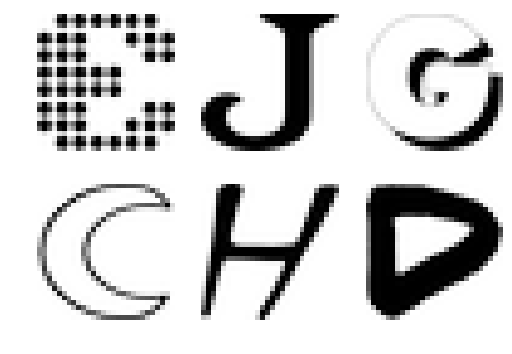

In [286]:
### notMNIST data
import numpy as np
import pandas as pd 
import seaborn as sns
import tensorflow as tf
from six.moves import range
import matplotlib.pyplot as plt
from __future__ import print_function
from six.moves import cPickle as pickle
%matplotlib inline

### Pickle 3D tensor [N x 28 x 28]
pickle_file = '/Users/rlance/Desktop/Data/udacity dl assignments/notMNIST.pickle'

### Read in dict
with open(pickle_file, 'rb') as f:
    
    save = pickle.load(f)
    train_dataset = save['train_dataset']
    train_labels = save['train_labels']
    valid_dataset = save['valid_dataset']
    valid_labels = save['valid_labels']
    test_dataset = save['test_dataset']
    test_labels = save['test_labels']
    del save  
    print("Raw data ---")
    print('Training set', train_dataset.shape, train_labels.shape)
    print('Validation set', valid_dataset.shape, valid_labels.shape)
    print('Test set', test_dataset.shape, test_labels.shape)

### Peek at a few images
for i in [0,1,2,3,4,5]:
    
    sample_image = train_dataset[i]  
    plt.subplot(2, 3, i+1)
    plt.imshow(sample_image) 
    plt.axis('off')
    
### Re-format  
image_size = 28
num_labels = 10

def reformat(dataset,labels):
    """ Compress N x 28 x 28 tensor into N x 28 * 28 matrix
  
      Args:
        dataset: N x 28 x 28 tensor
        labels: N x 1 vector, with each element the index of label

      Returns:
        dataset: N x 784 tensor
        labels: N x 10 tensor """
    
    dataset = dataset.reshape((-1,image_size * image_size)).astype(np.float32)
    labels = (np.arange(num_labels) == labels[:,None]).astype(np.float32)
    return dataset,labels

train_dataset_notMNIST, train_labels_notMNIST = reformat(train_dataset, train_labels)
valid_dataset_notMNIST, valid_labels_notMNIST = reformat(valid_dataset, valid_labels)
test_dataset_notMNIST, test_labels_notMNIST = reformat(test_dataset, test_labels)

print("Processed data ---")
print('Training set', train_dataset_notMNIST.shape, train_labels_notMNIST.shape)
print('Validation set', valid_dataset_notMNIST.shape, valid_labels_notMNIST.shape)
print('Test set', test_dataset_notMNIST.shape, test_labels_notMNIST.shape)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


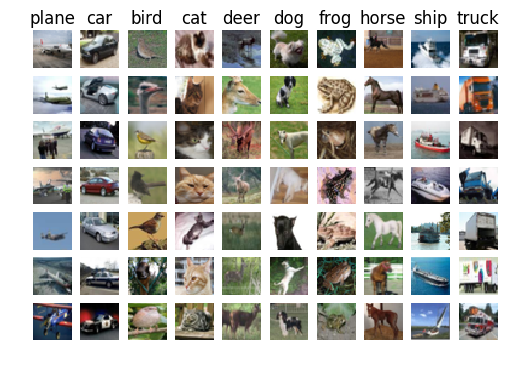

Train data shape:  (49000, 3072)
Train labels shape:  (49000, 10)
Validation data shape:  (1000, 3072)
Validation labels shape:  (1000, 10)
Test data shape:  (1000, 3072)
Test labels shape:  (1000, 10)


In [203]:
### CIFAR10 data

import os
import random
import numpy as np
from IPython.display import Image
import matplotlib.pyplot as plt
from cs231n_module.data_utils import load_CIFAR10

plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
%autoreload
%matplotlib inline
%load_ext autoreload

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
   
    """ Load the CIFAR-10 dataset (N, 32, 32, 3) from disk. 
        Preprocess by subtracting mean.
  
      Args:
        num_training: N x 28 x 28 tensor
        num_validation: N x 1 vector, with each element the index of label
        num_test: 

      Returns:
        X_train: num_training x 3072 (32 * 32 * 3) tensor
        y_train: num_training x 1
        X_val: num_validation x 3072
        y_val: num_validation x 1
        X_test: num_test x 3072
        y_test: num_test x 1 """
    
    # Load the raw CIFAR-10 data
    cifar10_dir = 'cs231n_module/datasets/cifar-10-batches-py'
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
        
    # Show examples of training images from each class
    classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
    num_classes = len(classes)
    samples_per_class = 7
    
    for y, cls in enumerate(classes):
        idxs = np.flatnonzero(y_train == y)
        idxs = np.random.choice(idxs, samples_per_class, replace=False)
        for i, idx in enumerate(idxs):
            plt_idx = i * num_classes + y + 1
            plt.subplot(samples_per_class, num_classes, plt_idx)
            plt.imshow(X_train[idx].astype('uint8'))
            plt.axis('off')
            if i == 0:
                plt.title(cls)
    plt.show()

    # Subsample the data
    mask = range(num_training,num_training + num_validation)
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = range(num_training)
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = range(num_test)
    X_test = X_test[mask]
    y_test = y_test[mask]

    # Normalize the data: Subtract the mean image
    mean_image = np.mean(X_train, axis=0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image

    # Reshape data to rows
    X_train = X_train.reshape(num_training, -1)
    X_val = X_val.reshape(num_validation, -1)
    X_test = X_test.reshape(num_test, -1)

    return X_train, y_train, X_val, y_val, X_test, y_test

# Invoke the above function to get our data.
train_dataset_cifar10, train_labels_cifar10, valid_dataset_cifar10, valid_labels_cifar10, test_dataset_cifar10, test_labels_cifar10 = get_CIFAR10_data()

train_dataset_cifar10 = train_dataset_cifar10.astype(np.float32)
valid_dataset_cifar10 = valid_dataset_cifar10.astype(np.float32) 
test_dataset_cifar10 = test_dataset_cifar10.astype(np.float32)

train_labels_cifar10 = (np.arange(num_labels) == train_labels_cifar10[:,None]).astype(np.float32)
valid_labels_cifar10 = (np.arange(num_labels) == valid_labels_cifar10[:,None]).astype(np.float32)
test_labels_cifar10 = (np.arange(num_labels) == test_labels_cifar10[:,None]).astype(np.float32)

print('Train data shape: ', train_dataset_cifar10.shape)
print('Train labels shape: ', train_labels_cifar10.shape)
print('Validation data shape: ', valid_dataset_cifar10.shape)
print('Validation labels shape: ', valid_labels_cifar10.shape)
print('Test data shape: ', test_dataset_cifar10.shape)
print('Test labels shape: ', test_labels_cifar10.shape)

---

###  Decision rule

** Linear mapping - ** 

(1) Input impage $X$ 

* $[1 x D]$ where $D$ is flattened pixel vector. 

(2) Weights, $W$: 

* The weight matrix $W$ is $[D x K]$, and assigns a weight to each pixel in $X$ for each of $k$ classes.
* $W$ is just $k$ different classifiers. Each column in $W$ compute a seperate class score from the input.
* The learned weights in $W$ serve as template for each class. 
* For example, “ship” template would have lot of positive weights across its blue channel weights / negative in red and green.

(3) Bias, $b$: 

* $[1 x K]$ vector that influences the output scores without interacting with the actual data.

$$ f(W,X,b) = W X + b $$

** Adding non-linearities - **

(1) Many non-linear operations to choose from - 

* TanH, RelU, etc.

(2) `RelU` is a very simple non-linear function and is particularly good / reccomended - 
* Linear if x > 0 and non-linear everywhere else.
* We connect output tensor from matrix multiply to `RelU`.
* It was found to greatly accelerate (e.g. a factor of 6 in Krizhevsky et al.) the convergence of stochastic gradient descent compared to the sigmoid/tanh functions. It is argued that this is due to its linear, non-saturating form.
 
Sources - 

* [CS231n: Neural Networks 1](http://cs231n.github.io/neural-networks-1/)
* [TensorFlow tutorial](https://www.tensorflow.org/versions/r0.11/tutorials/mnist/pros/index.html#deep-mnist-for-experts)

** Implement in TensorFlow - **

* `Placeholders`: Values we'll populate (e.g., a batch of input) when we ask TensorFlow to run a computation. 
* `Variable`: Modifiable tensors that live in TensorFlow's graph of interacting operations. Value must be specified.


In [49]:
### 1-layer neural net
import tensorflow as tf

image_size = 28
batch_size = 128
num_hidden_nodes = 1024
num_labels = 10

graph = tf.Graph()
with graph.as_default():
    
    # Dims: N x 28 * 28
    X = tf.placeholder(tf.float32,shape=(batch_size,image_size*image_size))
    
    # tf.truncated_normal initializer: generates a random distribution with a given mean and standard deviation.
    # Dims: 28 * 28 x K 
    W1 = tf.Variable(tf.truncated_normal([image_size * image_size,num_hidden_nodes]))
    W2 = tf.Variable(tf.truncated_normal([num_hidden_nodes,num_labels]))
    
    # Dims: 1 x K
    B1 = tf.Variable(tf.zeros([num_hidden_nodes]))
    B2 = tf.Variable(tf.zeros([num_labels]))
    
    # RelU is conntected to output Tensor from matrix multiply operation 
    hidden_1 = tf.nn.relu(tf.matmul(X,W1) + B1)
    logits = tf.matmul(hidden_1,W2) + B2
    
    # . . . 

--- 

###  Loss function

** Max-margin loss function - **

* Using our linear score function, each class has a score.
* The multiclass SVM treats the outpits as uncalibrated (and possibly difficult to interpret) scores.
* We can compute the margin (delta) in score between the correct class and all incorrect classes.
* We count loss if the incorrect class $< \Delta$ margin relative to correct score.

$$ L_i = \sum max(0,s_j - s_{yi} + \Delta) + R $$ 

** Softmax function and cross-entropy loss - ** 

* Convert raw scores (logits) into probabilities.
* The softmax classifier treats the outputs as unnormalized log probabilities.
* So, we must exponentiate to get the unnormalized class probabilities.
* Thus, we can compute the normalized probability of any given class, $k$:
* Softmax is serving as an "activation" function re-shaping the output of our linear function into the form we want.
 
$$ S = P(Y = k) = \frac{e^{s_k}}{\sum_j e^{s_j}} $$ 

Compute loss from Softmax probabilities and one-hot encoded labels using -  

* Correct label can be one-hot encoded vector (1 for correct label, and the rest are zeros), $L$
* The cross-entropy objective wants the predicted distribution to have all of its mass on the correct answer.
* Then, can get distance between label, $L$, and Softmax computed probabilities, $S$, using cross-entropy

$$ D(S,L) = - \sum_i L_i log(S_i) $$

Sources - 

* [CS231n: Linear Classification]( http://cs231n.github.io/linear-classify/)

--- 

###  Gradient and optimization
 
** Back-prop to compute the gradient through the network - **

* Every gate in a circuit diagram gets inputs and computes 1) output value and 2) local gradient of its inputs with respect to its output value.
* Assume two inputs, $y_1$ and $y_2$, into a single gate and an output $z = L$. 
* We start from the right, and compute: 

$$\frac{dL}{dz} = 1$$

* We we can tether $x$ to $L$ with the chain rule:

$$ \frac{dL}{dy_1} = \frac{dL}{dz} \frac{dz}{dy_1}$$

* $y_1$ may then be the output of another neuron, with inputs $x_1$ and $x_2$.
* We can then tether $x_1$ to $L$ similarly:

$$ \frac{dL}{dx_1} = \frac{dL}{dz} \frac{dz}{dy_1} \frac{dy_1}{dx_1} $$

* Backwards pass: recursively apply chain rule to compute gradients all the way to the inputs of the circuit. 

** Compute gradient on batches of the input data - **

* Training data can be large (e.g., on order of millions of examples). 
* It's wasteful to compute gradient across all of our training data.
* We can address this by computing the gradient over batches of the training data. 
* The reason this works well is that the examples in the training data are correlated.

Sources - 

* [CS231n optimization 2 notes](http://cs231n.github.io/optimization-2/)
* [C Olah backprop blog](http://colah.github.io/posts/2015-08-Backprop/)


** Implement in TensorFlow - **

* `tf.nn.softmax_cross_entropy_with_logits()`: Pass logit tensor (with label) to compute softmax and loss.
* `tf.train.GradientDescentOptimizer()`: Pass learning rate (e.g., 0.5) specify that we want to minimize loss.


In [ ]:
graph = tf.Graph()
with graph.as_default():
    
    # Dims: N x pixels
    X = tf.placeholder(tf.float32,shape=(batch_size,pixels))
    
    # Dims: pixels x hidden layers
    W1 = tf.Variable(tf.truncated_normal([pixels,num_hidden_nodes]))
    W2 = tf.Variable(tf.truncated_normal([num_hidden_nodes,num_labels]))
    
    # Dims: 1 x K
    B1 = tf.Variable(tf.zeros([num_hidden_nodes]))
    B2 = tf.Variable(tf.zeros([num_labels]))
    
    # RelU is conntected to output Tensor from matrix multiply operation 
    hidden_1 = tf.nn.relu(tf.matmul(X,W1) + B1)
    logits = tf.matmul(hidden_1,W2) + B2
    
    # Softmax computed from logit and softmax 
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits,tf_train_labels))
    
    # Optimizer
    optimizer = tf.train.GradientDescentOptimizer(0.5).minimize(loss)

--- 

###  Network size and case for regularization

** Larger networks have more capacity - **

* The model with 3 hidden neurons only has the representational power to classify the data in broad strokes. 
* It models the data as two blobs and interprets the few red points inside the green cluster as outliers (noise).
* the model with 20 hidden neurons fits all the training data.
* But, this comes at the cost of segmenting the space into many disjoint red and green decision regions.
*  *** In practice, this could lead to worse generalization on the test set due to overfitting. ***

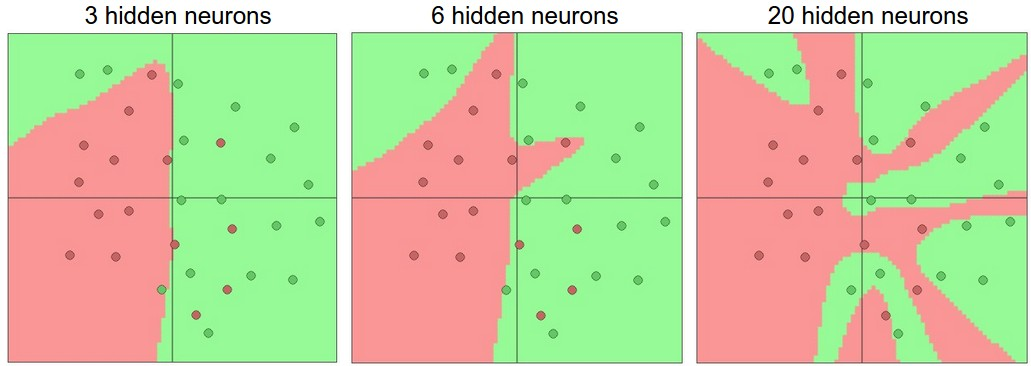

In [211]:
Image(filename=os.getcwd()+'/img/depth.jpeg')

--- 

###  Regualization

** Larger networks - **
 
* Pro: Can represent more complicated functions.
* Con: Overfitting occurs when high capacity model fits the noise in the data instead of the underlying relationship.
* In practice, we over choose a model that is far too big for our data and use regularization to limit overfitting.

** L2 regularization - **
  
* L2 norm discourages large weights through an elementwise quadratic penalty over all parameters.
* We simply summing up all the squared elements of $W$: $\sum_k \sum_l W_{k,l}^2$
* For examples $W = [1,0,0,0]$ will have higher regularization loss than $W = [0.25,0.25,0.25,0.25]$
* A $W$ matrix that uses more features (having diffuse weights) is preferable, in general.
* Thus, $W = [0.25,0.25,0.25,0.25]$ will be favored in classification with L2 regularization penality.
* Adds a term (a constant $\beta$ multiplied by the L2 norm of $W$) to the loss function that penalizes large weights.

** Dropout - **

* During training, dropout can be interpreted as sampling a neural network within the full neural network.
* We randomly (and temporarily) delete a fraction the hidden neurons in the network. 
* The dropout procedure is like averaging the effects of a very large number of different networks. 

Sources - 

* [CS231n linear classification notes](http://cs231n.github.io/linear-classify/)
* [CS231n neural networks 2 notes](http://cs231n.github.io/neural-networks-2/)
* [Slide 6-13]: 005c-yann-lecun-optimization.pdf
* [Slides 126 - 129]: 000c-yann-lecun-lecon-inaugurale-college-de-france-20160204.pdf
* Good review [here](http://neuralnetworksanddeeplearning.com/chap3.html#overfitting_and_regularization)

--- 

###  Practical considerations

** Weight initilization - **

(1) Zero weight initialization is bad -

* This is a mistake, because every neuron in the network computes the same output.
* That means, they will also all compute the same gradients during backpropagation.
* Then, they will undergo the exact same parameter updates.
  
(2) Initialize with small numbers for symmetry breaking -

* It is common to initialize the weights of the neurons to small numbers (e.g., symmetry breaking). 
* They will compute distinct updates and integrate themselves as diverse parts of the full network. 

(2) Normalize weight variance to improve rate of convergence - 

* Distribution of the outputs from a randomly initialized neuron has a variance that grows with the number of inputs.
* Normalize the variance of each neuron’s output to 1 by scaling its weight vector by the square root of its fan-in (i.e. its number of inputs).
* This ensures that all neurons in the network have approximately the same output distribution. 
* This empirically improves the rate of convergence.
* For the case of ReLU neurons, reaching variance of neurons in the network should be `sqrt(2.0/n)` 

(4) Initialize $b$ to zero.

** Batch normalization - **

* Useful technique that alleviates a lot of headaches with properly initializing neural networks.
* Force the activations throughout a network to take on a unit gaussian distribution at the beginning of the training.
* Insert the BatchNorm layer after fully connected layers (or convolutional layers) and before non-linearities. 

** Validation splits - **

* A single validation set of respectable size simplifies the code base, without the need for cross-validation.
* You’ll hear people say they “cross-validated” a parameter. 
* But many times it is assumed that they still only used a single validation set.

** Choice of optimizer / learning rate - **

(1) Vanilla update 

* Change the parameters along the negative gradient direction with learning_rate as a hyperparameter.

(2) Momentum update 

* Has better converge rates on deep networks.
* Parameter vector will build up velocity in any direction that has consistent gradient.

** Learning rate annealing ** 

* It is usually helpful to anneal the learning rate over time. 
* With a high learning rate, the system contains too much kinetic energy. 
* Tthe parameter vector bounces chaotically, unable to settle down into deeper / narrower parts of the loss function.

(1) Step decay 

* Reduce the learning rate by some factor every few epochs. 
* In practice, step decay dropout is slightly preferable.
* The hyperparameters it involves (the fraction of decay / the step timings) are more interpretable.
 
(2) RMSprop

* RMSprop is a very effective adaptive learning rate method. 

(3) Adam

*  Adam is a recently proposed update that looks a bit like RMSProp with momentum. 

Source - 

* [CS231n neural networks 2 notes](http://cs231n.github.io/neural-networks-2/)
* [Lecture 6 of Geoff Hinton’s Coursera Class](http://www.cs.toronto.edu/~tijmen/csc321/slides/lecture_slides_lec6.pdf)

---

###  Example 2-layer net

Structure similar to [CS231n assignment 1](http://cs231n.github.io/assignments2016/assignment1/), but implement in TF: 

** Network size: ** 

* Reccomendation: As big as computational budget allows, with regularization to control over-fitting.
* Here: Start small, with 2-layers, as I'm running this on a laptop and want to explore sensitivity quickly :)

** Non-linearity: ** 

* `RelU` is reccomended and implemented as `np.maximum(0, fc_1)` in CS231n `two_layer_net.py`
* Here: Implemented in TF: `tf.nn.relu`
 
** Weight initialization: ** 

* Initialization reccomended for `RelU`: `tf.truncated_normal([fan_in,fan_out], stddev=np.sqrt(2.0 / (fan_in) )))` 
* Here: Implemented as in CS231n `two_layer_net.py` 

** Regularization: ** 

* Reccomendation: Numerous methods, include dropout (`tf.nn.dropout`) and regularization
* Here: L2 norm, with `beta_regul * (tf.nn.l2_loss(W1) + tf.nn.l2_loss(W2))`

** Learning rate: ** 

* CS231n `two_layer_net.py` uses learning rate decay every epoch:`learning_rate *= learning_rate_decay`  
* CS231n initial conditions are `learning_rate=1e-4` and `learning_rate_decay=0.95`
* In TF: `learning_rate = tf.train.exponential_decay(0.5, global_step, 1000, 0.65, staircase=True)`
* Here: Use a fixed value to start.

http://stackoverflow.com/questions/33919948/how-to-set-adaptive-learning-rate-for-gradientdescentoptimizer

** Optimizer / learning rate:  **

* Reccomendation: `tf.train.AdamOptimizer`
* Here: `tf.train.GradientDescentOptimizer`


In [414]:
def accuracy(predictions,labels):
    
    """ % correctly classified examples
    Args:
        predictions: class predictions [N,1] 
        labels: class labels [N,1] 
    
    Returns:
        accuracy
    """
    
    accuracy = (100.0 * np.sum(np.argmax(predictions, 1) == np.argmax(labels,1)) / predictions.shape[0])
    return accuracy

def run_two_layer_net(train_dataset,train_labels,valid_dataset,valid_labels,test_dataset,test_labels,
                        pixels,num_labels,num_steps,opt,learning_rate,title,beta_,plot):

    """ Two layer neural net
  
    Args:
        train_dataset: train data [N x pixels]
        train_labels:  train labels [N x num_labels]
        valid_dataset: validation data [v x pixels]
        valid_labels: validation labels [v x num_labels]
        test_dataset: train data [t x pixels]
        test_labels: test labels [t x num_labels]
        pixels: size of flattened image (l x w x d)
        num_labels: labels
        num_steps: step in optimization
        opt: optimizer 
        learning_rate: learning rate
        title: title
        beta_regul: regularization coef
        plot: flag for plotting
    
    Returns:
        dataset: df with loss and accuracies """

    graph = tf.Graph()
    with graph.as_default():

        # Training data
        # Dims: B x pixels
        tf_train_dataset = tf.placeholder(tf.float32,shape=(batch_size,pixels))
        tf_train_labels = tf.placeholder(tf.float32,shape=(batch_size,num_labels))
        beta_regul = tf.placeholder(tf.float32)
        
        # Validation / test data
        # Dims: N x pixels
        tf_valid_dataset = tf.constant(valid_dataset)
        tf_test_dataset = tf.constant(test_dataset)

        # Count the number of steps taken
        global_step = tf.Variable(0)  
        
        # Weights
        # tf.truncated_normal initializer: random distribution with a given mean and standard deviation
        # Dims: pixels x K 
        std = 1e-4
        W1 = tf.Variable(std * np.random.randn(pixels,num_hidden_nodes_1).astype(np.float32))
        W2 = tf.Variable(std * np.random.randn(num_hidden_nodes_1,num_labels).astype(np.float32))
        
        # Bias
        # Dims: 1 x K
        B1 = tf.Variable(tf.zeros([num_hidden_nodes_1]))
        B2 = tf.Variable(tf.zeros([num_labels]))
                
        # RelU 
        # Conntected to output Tensor from matrix multiply 
        hidden_1 = tf.nn.relu(tf.matmul(tf_train_dataset, W1) + B1)
        logits = tf.matmul(hidden_1,W2) + B2
        
        # Loss 
        # 1) Convert logits to softmax (normed probabilities)
        # 2) Get distance between softmax and one-hot encoded labels
        loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits,tf_train_labels)) + \
        beta_regul * (tf.nn.l2_loss(W1) + tf.nn.l2_loss(W2))
        
        # Compute gradient 
        # Baseline learning is decayed by specified percentrage 
        learning_rate = tf.train.exponential_decay(learning_rate,global_step,num_steps/10,0.95,staircase=True)        
        optimizer = opt(learning_rate).minimize(loss)
        
        # Test 
        # Convert raw logits to softmax probs
        train_prediction = tf.nn.softmax(logits)
        
        # Run on full validation set 
        valid_prediction_lay1 = tf.nn.relu(tf.matmul(tf_valid_dataset, W1) + B1)
        valid_prediction = tf.nn.softmax(tf.matmul(valid_prediction_lay1, W2) + B2)        
        
        # Run on full test set
        test_prediction_lay1 = tf.nn.relu(tf.matmul(tf_test_dataset, W1) + B1)
        test_prediction = tf.nn.softmax(tf.matmul(test_prediction_lay1, W2) + B2)
    
    stor_dat=pd.DataFrame()
    with tf.Session(graph=graph) as session:

        # Intialize 
        tf.initialize_all_variables().run()

        # Run a step
        for step in range(num_steps):

            # Batch - Get a "batch" of random data points from our training set 
            offset = (step * batch_size) % (train_labels.shape[0] - batch_size)
            batch_data = train_dataset[offset:(offset + batch_size), :]
            batch_labels = train_labels[offset:(offset + batch_size), :]

            # Feed data into the placeholders in the graph
            feed_dict = {tf_train_dataset : batch_data, 
                         tf_train_labels : batch_labels,
                         beta_regul: beta_}

            # Forward prop to get softmax probabilities, compute loss, back prop to get gradient, update weights
            _, l, predictions = session.run([optimizer,loss,train_prediction],feed_dict=feed_dict)
            
            # When we call valid_prediction.eval(), it will also run all dependencies in the graph.
            # Note that we would use epoch on larger datasets / GPUs: 
            # train_dataset_notMNIST.shape[0] / batch_size
            if (step % 5 == 0):
                stor_dat.loc[step,'Minibatch_loss'] = l
                stor_dat.loc[step,'Minibatch_accuracy'] = accuracy(predictions, batch_labels)
                stor_dat.loc[step,'Validation_accuracy'] = accuracy(valid_prediction.eval(), valid_labels)
                stor_dat.loc[step,'Test_accuracy'] = accuracy(test_prediction.eval(), test_labels)
        
        # Use eval to return numpy arrays (first two have dependency on feed_dict)
        train_prediction = train_prediction.eval(feed_dict=feed_dict)
        tf_train_labels = tf_train_labels.eval(feed_dict=feed_dict)
        w = [W1.eval(),W2.eval()]
    
    if plot:
        
        fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(7,3.5))

        stor_dat[['Minibatch_accuracy','Validation_accuracy','Test_accuracy']].plot(ax=axes[0],lw=1.)
        axes[0].set_xlabel("Step")
        axes[0].set_ylabel("% accuracy")
        axes[0].legend(prop={'size':8},loc='lower right')

        stor_dat[['Minibatch_loss']].plot(ax=axes[1],lw=1.)
        axes[1].set_xlabel("Step")
        axes[1].set_ylabel("Loss")
        axes[1].legend(prop={'size':8},loc='upper right')

        fig.tight_layout() 
    
    return stor_dat,w,train_prediction,tf_train_labels

** Parameter search:  **

* Reccomendation: Use log scale and random (rather than grid) search, since some of the hyperparameters matter much more than others.
* Here: Grid search


In [422]:
### Global
batch_size = 200
num_hidden_nodes_1 = 50
learning_rates = np.logspace(-6,0,10)
regularization_rates = np.logspace(-5,-1,6)
num_labels = 10
num_steps = 501

### Store
stor_cifar=pd.DataFrame(index=learning_rates,columns=regularization_rates)
stor_notmnist=pd.DataFrame(index=learning_rates,columns=regularization_rates)

### Param grid search
for learning_rate in learning_rates:
    for beta_regul in regularization_rates:

        ### cifar-10
        image_size = 32
        channels = 3
        result_cifar10,W_cifar10,train_p_cifar10,train_l_cifar10 = run_two_layer_net(train_dataset_cifar10,
                                                    train_labels_cifar10,
                                                    valid_dataset_cifar10,
                                                    valid_labels_cifar10,
                                                    test_dataset_cifar10,
                                                    test_labels_cifar10,
                                                    image_size*image_size*channels,
                                                    num_labels,
                                                    num_steps,
                                                    tf.train.GradientDescentOptimizer,
                                                    learning_rate,
                                                   'CIFAR10 - 2 Layer NN',
                                                    beta_regul,
                                                    0)
        
        acc = result_cifar10.loc[num_steps-1,'Minibatch_accuracy']
        stor_cifar.loc[learning_rate,beta_regul] = acc
                
        ### notMNIST
        image_size = 28
        channels = 1
        result_df_notMNIST_3NN,W,tf_train_prediction,tf_train_labels = run_two_layer_net(train_dataset_notMNIST,
                                                    train_labels_notMNIST,
                                                    valid_dataset_notMNIST,
                                                    valid_labels_notMNIST,
                                                    test_dataset_notMNIST,
                                                    test_labels_notMNIST,
                                                    image_size*image_size*channels,
                                                    num_labels,
                                                    num_steps,
                                                    tf.train.GradientDescentOptimizer,
                                                    learning_rate,
                                                    'notMNIST - 3 layer NN',
                                                    beta_regul,
                                                    0)
        
        acc = result_df_notMNIST_3NN.loc[num_steps-1,'Minibatch_accuracy']
        stor_notmnist.loc[learning_rate,beta_regul] = acc
        
stor_notmnist.index = np.round(np.log10(learning_rates),3)
stor_notmnist.columns = np.round(np.log10(regularization_rates),3)

stor_cifar.index = np.round(np.log10(learning_rates),3)
stor_cifar.columns = np.round(np.log10(regularization_rates),3)

** Network accuracy:  **

* *** Different datasets shows high degree of sensitivity to learning rate. ***

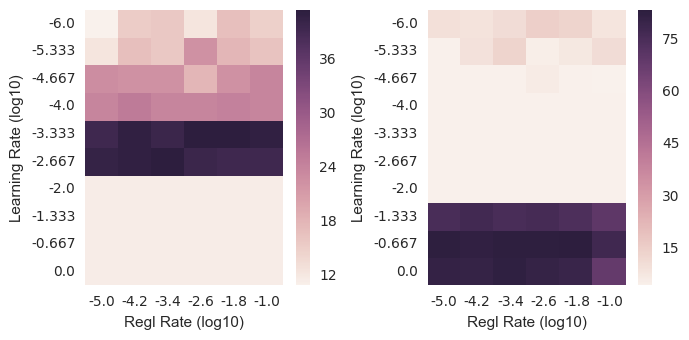

In [438]:
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(7,3.5))

sns.heatmap(pd.DataFrame(stor_cifar.fillna(0)),ax=axes[0])
axes[0].set_ylabel("Learning Rate (log10)")
axes[0].set_xlabel("Regl Rate (log10)")

sns.heatmap(pd.DataFrame(stor_notmnist.fillna(0)),ax=axes[1])
axes[1].set_ylabel("Learning Rate (log10)")
axes[1].set_xlabel("Regl Rate (log10)")

fig.tight_layout() 

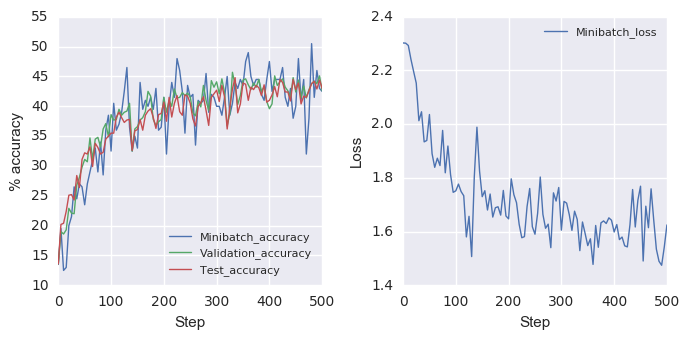

In [439]:
### cifar-10
image_size = 32
channels = 3

### Params
learning_rate = learning_rates[5]
beta_regul = regularization_rates[3]

### Run model
result_cifar10,W_cifar10,train_p_cifar10,train_l_cifar10 = run_two_layer_net(train_dataset_cifar10,
                                            train_labels_cifar10,
                                            valid_dataset_cifar10,
                                            valid_labels_cifar10,
                                            test_dataset_cifar10,
                                            test_labels_cifar10,
                                            image_size*image_size*channels,
                                            num_labels,
                                            num_steps,
                                            tf.train.GradientDescentOptimizer,
                                            learning_rate,
                                           'CIFAR10 - 2 Layer NN',
                                            beta_regul,
                                            1)

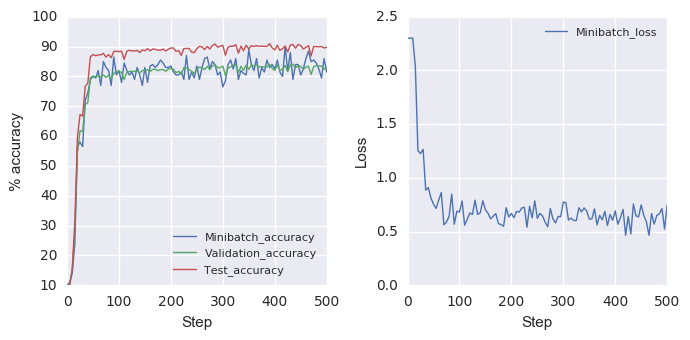

In [440]:
### notMNIST
image_size = 28
channels = 1
num_labels = 10

### Params
learning_rate = learning_rates[-1]
beta_regul = regularization_rates[3]
    
### Run model
result_df_notMNIST_3NN,W,tf_train_prediction,tf_train_labels = run_two_layer_net(train_dataset_notMNIST,
                                            train_labels_notMNIST,
                                            valid_dataset_notMNIST,
                                            valid_labels_notMNIST,
                                            test_dataset_notMNIST,
                                            test_labels_notMNIST,
                                            image_size*image_size*channels,
                                            num_labels,
                                            num_steps,
                                            tf.train.GradientDescentOptimizer,
                                            learning_rate,
                                            'notMNIST - 3 layer NN',
                                            beta_regul,
                                            1)

--- 

###  De-bugging the learning process

** Loss and accuracy **

(1) Epochs, which measure how many times every example has been seen during training in expectation:

* One epoch means that every example has been seen once. 
* It is preferable to track epochs rather than iterations (as iterations depend on arbitrary setting of batch size).

(2) Loss: 

Sanity check:

* On CIFAR-10 with a Softmax classifier we would expect the initial loss to be 2.302. 
* We expect a diffuse probability of 0.1 for each class (since there are 10 classes). 
* Softmax loss is the negative log probability of the correct class so: -ln(0.1) = 2.302.

Learning rate too low: 

* Improvements will be linear.
* With higher learning rates they will start to look more exponential.

Learning rate too high: 
 
* Loss can get stuck at worse values of loss (green line). 
* This is because there is too much "energy" in the optimization. 
* The parameters are bouncing around chaotically, unable to settle in a nice spot in the optimization landscape. 
  
Batch size:

* “Wiggle” in the loss is related to the batch size. 
* When the batch size is 1, the wiggle will be relatively high. 
* When the batch size is the full dataset, the wiggle will be minimal. 
* This is because every gradient update should be improving the loss function monotonically (unless learning rate is set too high).
 
(3) Accuracy:

Overfitting:

* Indicated by the gap between the training and validation accuracy. 
* The blue validation error curve shows very small validation accuracy compared to the training accuracy.
* When you see this in practice you probably want to increase regularization (stronger L2 weight penalty, more dropout, etc.) or collect more data. 

Under-capacity:

* Validation accuracy tracks the training accuracy fairly well. 
* This case indicates that your model capacity is not high enough.
* Make the model larger by increasing the number of parameters.

Source - 

* [CS231n neural networks 3 notes](http://cs231n.github.io/neural-networks-3/)
* http://homes.cs.washington.edu/~pedrod/papers/cacm12.pdf

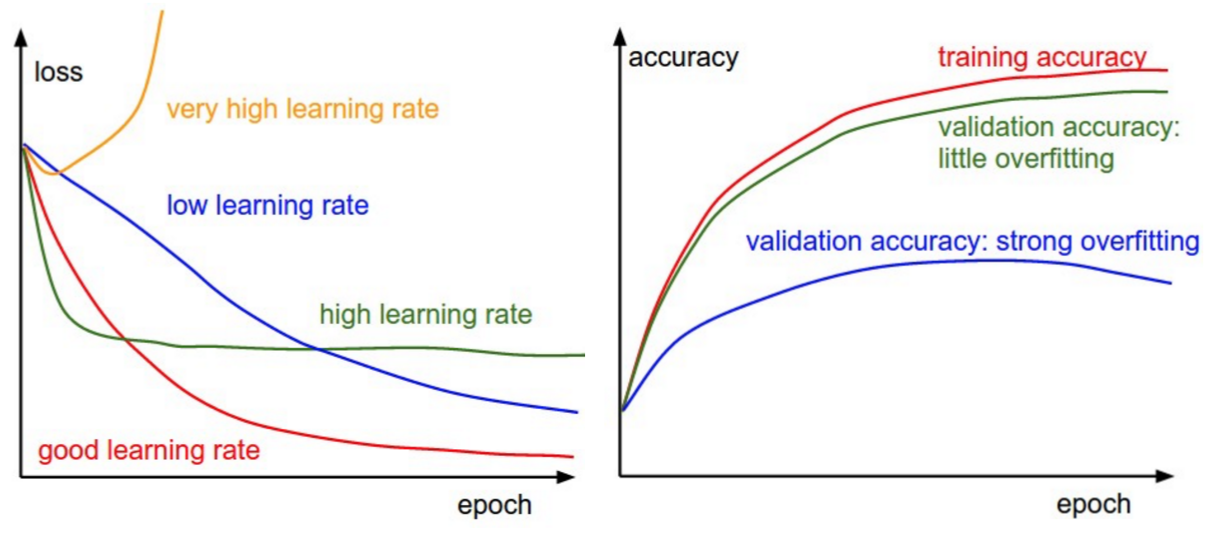

In [213]:
Image(filename=os.getcwd()+'/img/debugging.png')

--- 

### ConvNets

** Challenge with images **

(1) They have many features

* 200 pixel images requires fully connected neuron with 200 x 200 x 3 = 120,000 weights! 
* This large number of parameters will likley lead to over-fitting.

(2) Spatial invariance

* We want to use weight-sharing to learn common motifs (e.g., edges) independent of position in the image.

** ConvNets **

* Make the explicit assumption that the inputs are images.
* This allows us to encode certain properties into the architecture. 
* These then make the forward function more efficient to implement and reduces the parameters in the network.

** Convolution layer **

(1) General structure

* We start with a filter (below, $W_o$ 3 x 3 x 3).
* At each filter position, we compute the dot-product (e.g., first position for $W_o$ produces 6).
* We "convolve" the filter along the image (e.g., using hyperparameters of stride, etc) to produce a 2D "activation."
* We "convolve" a set of $d$ filters (e.g., $W_o$, $W_1$) to produce an output volume of $d$ depth.
* We will stack these $d$ activation maps along the depth dimension and produce the output volume.
* Intuituvely, each filter will learn to look for something different in the input.

(2) Hyperparameters

* Zero padding: Addition of zeros to the input volume. 
* Stride: Stride with which we slide the filter (e.g., 1 pixel).

(3) Preserving spatial dims

* With stride $S = 1$ and $F$ as the field size, then zero padding set to $P = (F - 1) / 2$ produces output volume with same size spatially as inpout. 
* This is common. 
* General formula for calculating how many neurons “fit:” $(W−F+2P) / S+1$

Source - 

* [CS231n convnets notes](http://cs231n.github.io/convolutional-networks/)
* [Slides 40 - 96]: 000c-yann-lecun-lecon-inaugurale-college-de-france-20160204.pdf
* http://www.wildml.com/2015/12/implementing-a-cnn-for-text-classification-in-tensorflow/#more-452


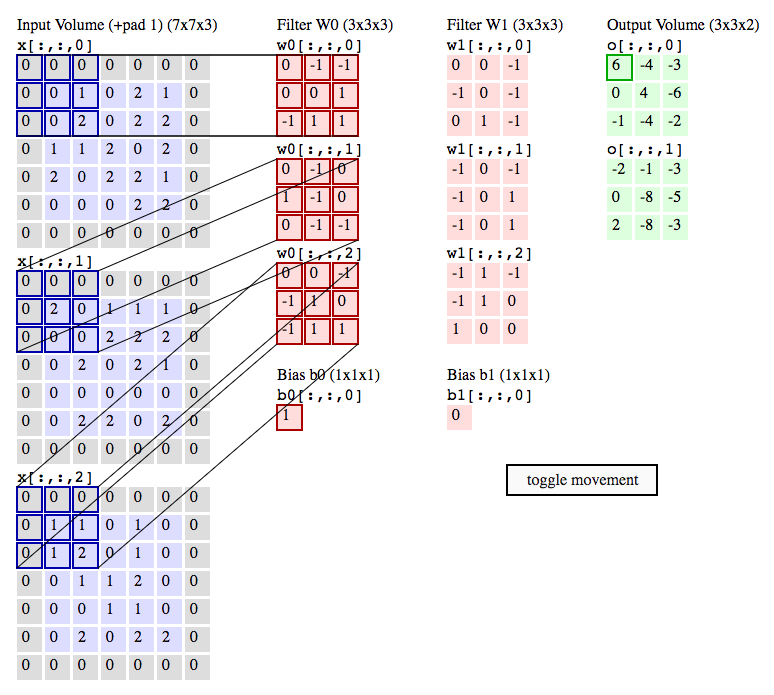

In [43]:
Image(filename=os.getcwd()+'/img/conv_nets_filter.png')

** Pooling Layer **

* Pooling layers are in-between successive Conv layers in a ConvNet architecture. 
* They function to progressively reduce the spatial size of the representation. 
* This is to reduce the amount of parameters and computation in the network, and to also control overfitting. 

---

###  Example 4-layer ConvNet

** Network size: ** 

* Reccomendation: As big as computational budget allows, with regularization to control over-fitting.
* Here: Start small, with 4-layers, as I'm running this on a laptop and want to explore sensitivity quickly :)

** Non-linearity: ** 

* `RelU` is reccomended and implemented as `np.maximum(0, fc_1)` in CS231n `two_layer_net.py`
* Here: Implemented in TF: `tf.nn.relu`
 
** Weight initialization: ** 

* Initialization reccomended for `RelU`: `tf.truncated_normal([fan_in,fan_out], stddev=np.sqrt(2.0 / (fan_in) )))` 
* Here: Implemented as in TF tutorial

** Conv **

* [`Same`](http://stackoverflow.com/questions/37674306/what-is-the-difference-between-same-and-valid-padding-in-tf-nn-max-pool-of-t) padding with stride 1

** Regularization: ** 

* Dropout (`tf.nn.dropout`) with 

** Optimizer / learning rate:  **

* `tf.train.AdamOptimizer`


In [500]:
def weight_variable(shape):
    
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

def conv2d(x, W):
        
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
        
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

def conv_model(data):
    
    ''' ConvNet model '''

    hidden = tf.nn.relu(conv2d(data,layer1_weights) + layer1_biases)
    h_pool1 = max_pool_2x2(hidden)
    hidden = tf.nn.relu(conv2d(h_pool1,layer2_weights) + layer2_biases)
    h_pool2 = max_pool_2x2(hidden)
    shape = h_pool2.get_shape().as_list()
    reshape = tf.reshape(h_pool2, [shape[0], shape[1] * shape[2] * shape[3]])
    hidden = tf.nn.relu(tf.matmul(reshape, layer3_weights) + layer3_biases)
    hidden_drop = tf.nn.dropout(hidden, keep_prob)
    return tf.matmul(hidden_drop,layer4_weights) + layer4_biases

def reformat(dataset):
    
    ''' Re-format data for passing to convnet '''
    
    dataset = dataset.reshape((-1, image_size, image_size, num_channels)).astype(np.float32)
    return dataset

def run_four_layer_convnet(train_dataset,train_labels,valid_dataset,valid_labels,test_dataset,test_labels,
                        image_size,num_channels,num_labels,num_steps,opt,learning_rate,title,beta_,plot,
                        depth,patch_size):

    """ Four layer convnet with structure: 
  
    Args:
        train_dataset: train data [N x pixels]
        train_labels:  train labels [N x num_labels]
        valid_dataset: validation data [v x pixels]
        valid_labels: validation labels [v x num_labels]
        test_dataset: train data [t x pixels]
        test_labels: test labels [t x num_labels]
        image_size: size of flattened image (image_size x image_size x num_channels)
        num_channels: color channels (image_size x image_size x num_channels)
        num_labels: labels
        num_steps: step in optimization
        opt: optimizer 
        learning_rate: learning rate
        title: title
        beta_regul: regularization coef
        plot: flag for plotting
        depth: conv layer depth
        patch_size: patch 
    
    Returns:
        dataset: df with loss and accuracies """

    graph = tf.Graph()
    with graph.as_default():
        
        # Batch 
        tf_train_dataset = tf.placeholder(tf.float32, shape=(batch_size, image_size, image_size, num_channels))
        tf_train_labels = tf.placeholder(tf.float32, shape=(batch_size, num_labels))
        tf_valid_dataset = tf.constant(valid_dataset)
        tf_test_dataset = tf.constant(test_dataset)
        keep_prob = tf.placeholder(tf.float32)

        # Count the number of steps taken
        global_step = tf.Variable(0)  
        
        ### Parameters
        # First convolutional layer operates on input volume 
        global layer1_weights
        global layer1_biases
        layer1_weights = weight_variable([patch_size,patch_size,num_channels,depth])
        layer1_biases = bias_variable([depth])
        
        # Second convolutional layer operates on volume from first layer
        global layer2_weights
        global layer2_biases
        layer2_weights = weight_variable([patch_size,patch_size,depth,depth])
        layer2_biases = bias_variable([depth])

        # Each conv layer keeps spatial dim of input image_size x image_size (stride = 1, padding = 'Same')
        # After each conv layer we down-sample by 2x with max pooling, and then add fully connected layer
        global layer3_weights
        global layer3_biases
        layer3_weights = tf.Variable(tf.truncated_normal([image_size // 4 * image_size // 4 * depth, num_hidden], stddev=0.1))
        layer3_biases = tf.Variable(tf.constant(1.0, shape=[num_hidden]))
        
        # Final layer get from hidden layer to the number of labels
        global layer4_weights
        global layer4_biases      
        layer4_weights = tf.Variable(tf.truncated_normal([num_hidden, num_labels], stddev=0.1))
        layer4_biases = tf.Variable(tf.constant(1.0, shape=[num_labels]))
        
        ### Model
        logits = conv_model(tf_train_dataset)
        loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits, tf_train_labels))
        optimizer = opt(learning_rate).minimize(loss)

        # Predictions for the training, validation, and test data.
        train_prediction = tf.nn.softmax(logits)
        valid_prediction = tf.nn.softmax(conv_model(tf_valid_dataset))
        test_prediction = tf.nn.softmax(conv_model(tf_test_dataset))

    stor_dat=pd.DataFrame()
    with tf.Session(graph=graph) as session:
    
        tf.initialize_all_variables().run()
    
        for step in range(num_steps):

            offset = (step * batch_size) % (train_labels.shape[0] - batch_size)
            batch_data = train_dataset[offset:(offset + batch_size), :, :, :]
            batch_labels = train_labels[offset:(offset + batch_size), :]

            feed_dict = {tf_train_dataset : batch_data, 
                         tf_train_labels : batch_labels,
                         keep_prob: float(0.5)}

            _, l, predictions = session.run([optimizer, loss, train_prediction], feed_dict=feed_dict)

            # When we call valid_prediction.eval(), it will also run all dependencies in the graph.
            # Note that we would use epoch on larger datasets / GPUs: 
            # train_dataset_notMNIST.shape[0] / batch_size
            if (step % 50 == 0):
                # print('Minibatch loss at step %d: %f' % (step, l))
                stor_dat.loc[step,'Minibatch_loss'] = l
                stor_dat.loc[step,'Minibatch_accuracy'] = accuracy(predictions, batch_labels)
                stor_dat.loc[step,'Validation_accuracy'] = accuracy(valid_prediction.eval(), valid_labels)
                stor_dat.loc[step,'Test_accuracy'] = accuracy(test_prediction.eval(), test_labels)
    
    if plot:
        
        fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(7,3.5))

        stor_dat[['Minibatch_accuracy','Validation_accuracy','Test_accuracy']].plot(ax=axes[0],lw=1.)
        axes[0].set_xlabel("Step")
        axes[0].set_ylabel("% accuracy")
        axes[0].legend(prop={'size':8},loc='lower right')

        stor_dat[['Minibatch_loss']].plot(ax=axes[1],lw=1.)
        axes[1].set_xlabel("Step")
        axes[1].set_ylabel("Loss")
        axes[1].legend(prop={'size':8},loc='upper right')

        fig.tight_layout() 
    
    return stor_dat

CPU times: user 2h 20min 39s, sys: 44min 32s, total: 3h 5min 12s
Wall time: 6h 4min 20s


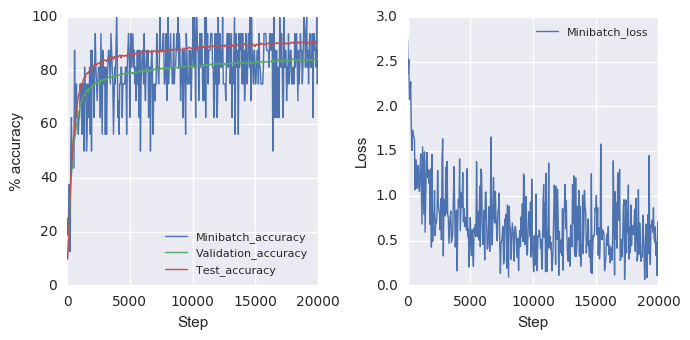

In [501]:
### Global
depth = 16
patch_size = 5 
num_hidden = 64
batch_size = 16
num_steps = 20001

### Params
learning_rate = 1e-4
beta_regul = regularization_rates[3]

### notMNIST
image_size = 28
num_channels = 1
num_labels = 10

### Re-format input data
train_X_conv_notMNIST = reformat(train_dataset_notMNIST)
valid_X_conv_notMNIST = reformat(valid_dataset_notMNIST)
test_X_conv_notMNIST = reformat(test_dataset_notMNIST)

### Run model
%time results = run_four_layer_convnet(train_X_conv_notMNIST,train_labels_notMNIST,valid_X_conv_notMNIST,valid_labels_notMNIST,test_X_conv_notMNIST,test_labels_notMNIST,image_size,num_channels,num_labels,num_steps,tf.train.AdamOptimizer,learning_rate,'notMNIST - 4 layer convnet',beta_regul,1,depth,patch_size)

** Run on CIFAR-10 **

In [ ]:
### cifar-10
image_size = 32
channels = 3
num_labels = 10

### Re-format input data
train_X_conv_cifar10 = reformat(train_dataset_cifar10)
valid_X_conv_cifar10 = reformat(valid_dataset_cifar10)
test_X_conv_cifar10 = reformat(test_dataset_cifar10)

### Run model
%time result_cifar10 = run_four_layer_convnet(train_X_conv_cifar10,train_labels_cifar10,valid_X_conv_cifar10,valid_labels_cifar10,test_X_conv_cifar10,test_labels_cifar10,image_size,num_channels,num_labels,num_steps,tf.train.AdamOptimizer,learning_rate,'cifar10 - 4 layer convnet',beta_regul,1,depth,patch_size)

** Run time **

Sensitive to the step size at which we write metrics.

* We evaluate model ($.eval()$) on all validation and test data at these intervals! 
* At step size 50: CPU times: user 1min 4s, sys: 22.9 s, total: 1min 27s, Wall time: 34.9 s
* At step size 5: CPU times: user 6min 58s, sys: 2min 15s, total: 9min 14s Wall time: 3min 34s

** Layer visualizations **

Plot the first-layer features visually.

* Check learned weights at the end of learning for CIFAR-10. 
* The ship template contains a lot of blue pixels as expected. 
* Template will give a high score once it is matched against images of ships on the ocean with an inner product.

Hyperparameter optimization - 

http://cs231n.github.io/neural-networks-3/
http://cs231n.github.io/linear-classify/        

---

###  Interesting CV datasets / resources

** Udacity Challenge **
 
* https://medium.com/udacity/challenge-2-using-deep-learning-to-predict-steering-angles-f42004a36ff3#.61k9eu2za
* https://github.com/SuriyaNitt/UCSDC
* https://github.com/gautamsharma7234/Self-Driving-Car-Udacity-Challenge-2

** DeepDrive **

http://deepdrive.io/

** ALVINN **

http://repository.cmu.edu/cgi/viewcontent.cgi?article=2874&context=compsci

** End to end learning **

http://yann.lecun.com/exdb/publis/pdf/lecun-dave-05.pdf

** DeepDriving **

http://deepdriving.cs.princeton.edu/

** NVIDIA End-to-end learning **

http://images.nvidia.com/content/tegra/automotive/images/2016/solutions/pdf/end-to-end-dl-using-px.pdf

** Unsupervised learning **

* [Slides 135 - 152]: 000c-yann-lecun-lecon-inaugurale-college-de-france-20160204.pdf
* 007c-yann-lecun-unsup-01.pdf
* 008c-yann-lecun-unsup-02.pdf

** Hardware / Infra **

* [Slides 53 - 58]: 003c-yann-lecun-architectures-rnn.pdf
* https://openai.com/blog/infrastructure-for-deep-learning/

** Future of ConvNets ** 
 
* [Slides 102 - 108]: 000c-yann-lecun-lecon-inaugurale-college-de-france-20160204.pdf


** Re-enforcement learning **

* http://karpathy.github.io/2016/05/31/rl/
* https://www.udacity.com/course/reinforcement-learning--ud600
* http://www.wildml.com/
* https://www.youtube.com/watch?v=i3lEG6aRGm8

** Generative models **

* https://openai.com/blog/generative-models/#contributions
